In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris= pd.read_csv(r"Iris - Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris.drop(columns='Id',inplace=True)

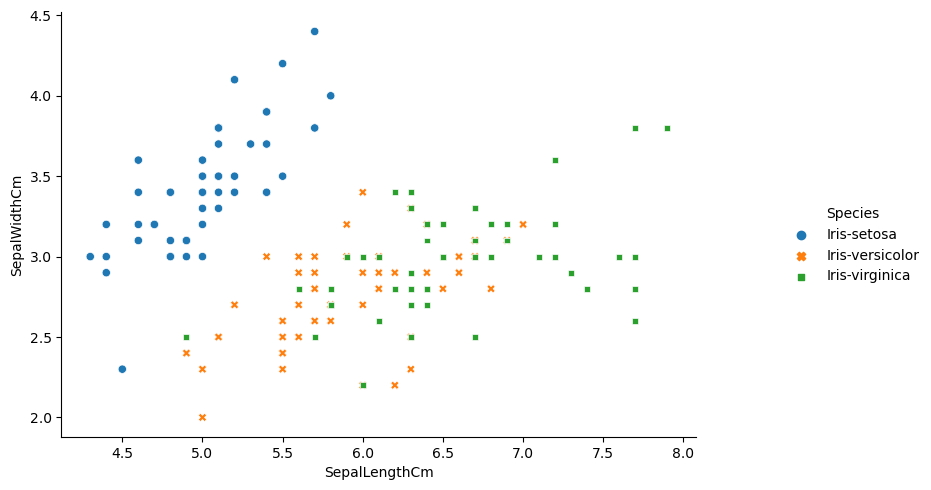

In [6]:
g = sns.relplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', style='Species')
g.fig.set_size_inches(10, 5)
plt.show()

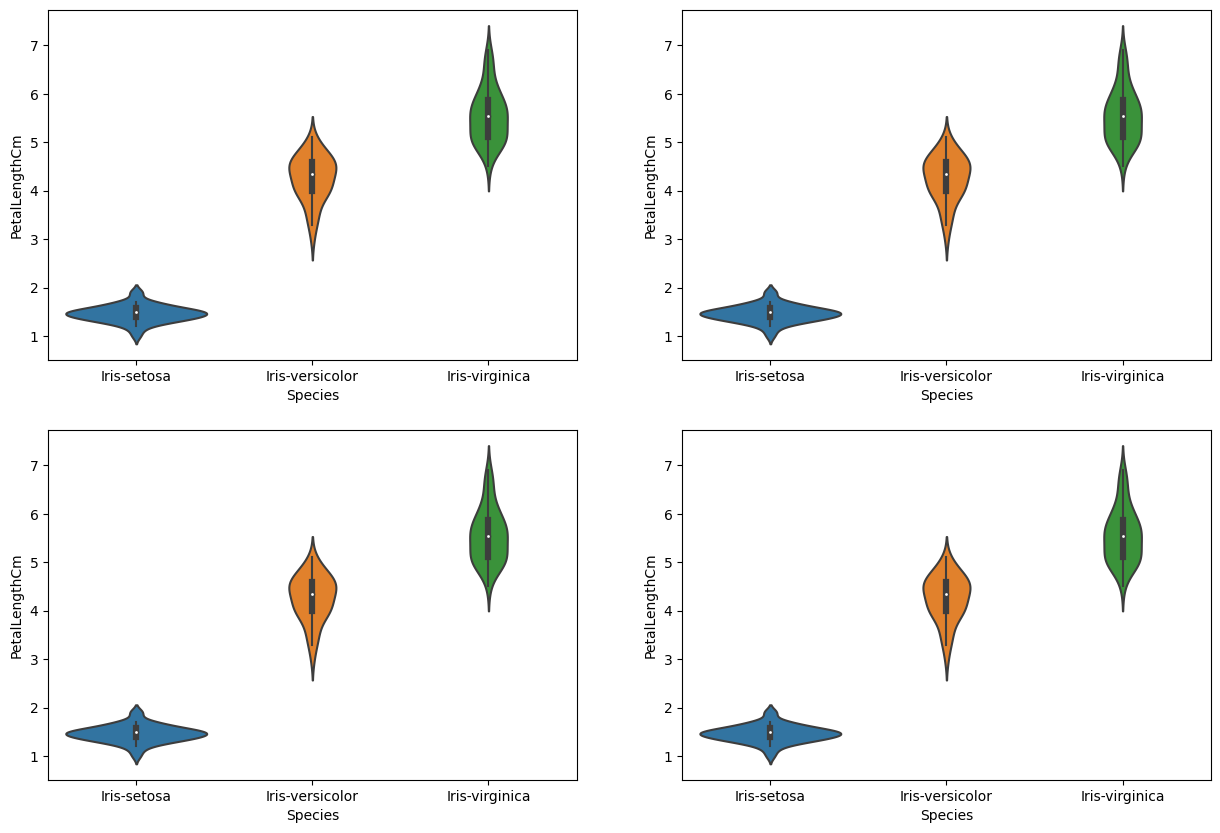

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.show()


C:\Users\kajal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kajal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


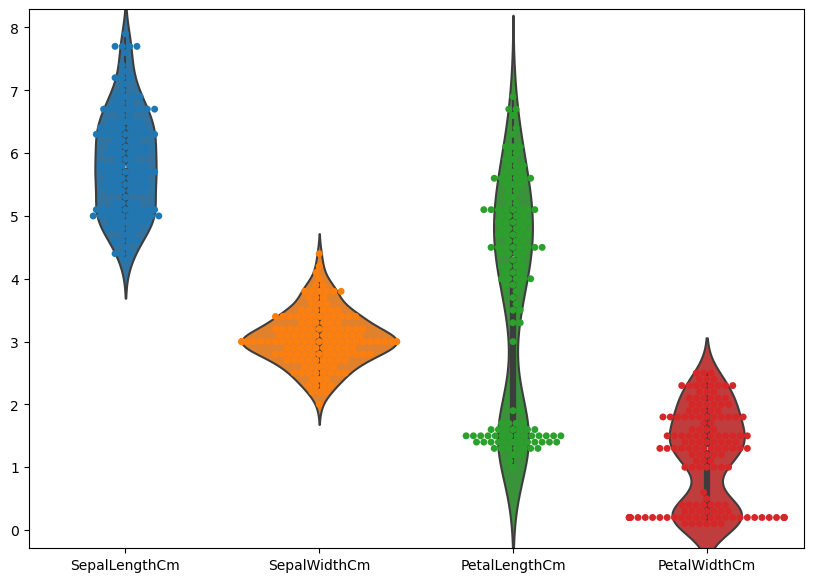

In [8]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot(data=iris)
plt.show()


<Axes: >

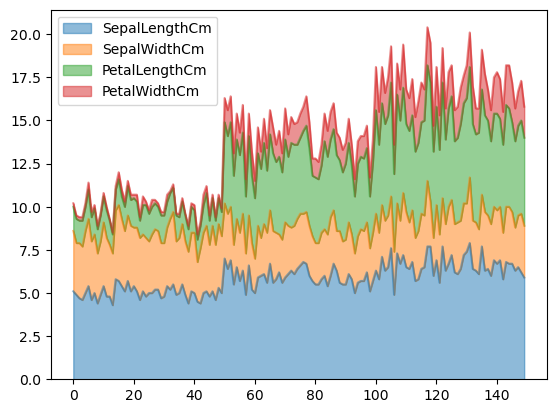

In [9]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.5)

In [10]:
# Exclude non-numeric columns from correlation computation
iris_numeric = iris.select_dtypes(include=['float64', 'int64'])
correlation_matrix = iris_numeric.corr()  # Compute correlation matrix
print(correlation_matrix)  # Display correlation matrix


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


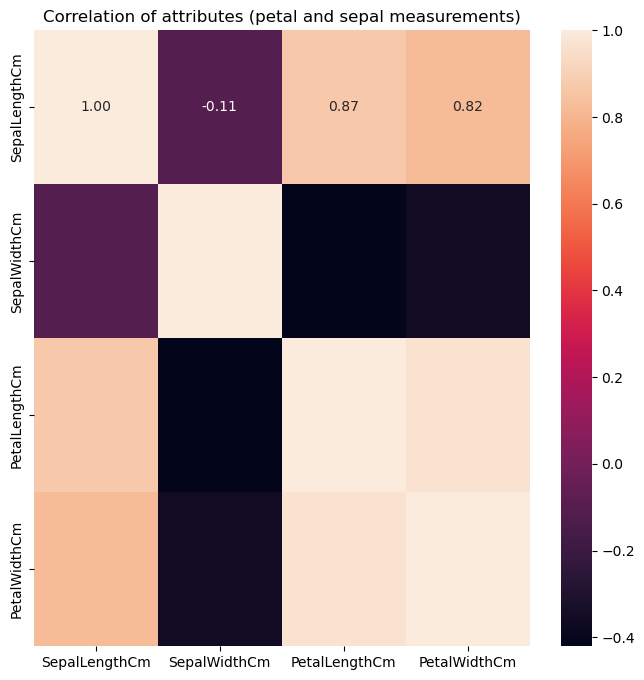

In [11]:
plt.subplots(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation of attributes (petal and sepal measurements)")
plt.show()


In [12]:
x=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values



In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
#Model Select
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Train and Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000
